# Procesamiento en Python acerca del Dataframe 1: Actividad de clientes (actividad_clientes.csv)

In [196]:
# Importar librerías necesarias

import pandas as pd
import numpy as np
import plotly as pl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msmo
from statistics import multimode, mean, median
import math

# Importar datos del archivo .csv

In [197]:
df = pd.read_csv("..\\dataset\\actividad_clientes.csv", index_col=0)
df.head()

,rental_date,return_date,first_name,last_name,district,postal_code,city,country,amount
rental_id,,,,,,,,,
76,2005-05-25 11:30:37,2005-06-03 12:00:37,mary,smith,nagasaki,35200,sasebo,japan,2.99
573,2005-05-28 10:35:23,2005-06-03 06:32:23,mary,smith,nagasaki,35200,sasebo,japan,0.99
1185,2005-06-15 00:54:12,2005-06-23 02:42:12,mary,smith,nagasaki,35200,sasebo,japan,5.99
1422,2005-06-15 18:02:53,2005-06-19 15:54:53,mary,smith,nagasaki,35200,sasebo,japan,0.99
1476,2005-06-15 21:08:46,2005-06-25 02:26:46,mary,smith,nagasaki,35200,sasebo,japan,9.99


# Vemos las propiedades de nuestra tabla

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15861 entries, 76 to 15725
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rental_date  15861 non-null  object 
 1   return_date  15861 non-null  object 
 2   first_name   15861 non-null  object 
 3   last_name    15861 non-null  object 
 4   district     15761 non-null  object 
 5   postal_code  15861 non-null  int64  
 6   city         15861 non-null  object 
 7   country      15861 non-null  object 
 8   amount       15861 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


# Vemos cauntos valores nulos tenemos

In [199]:
df.isna().sum()

rental_date      0
return_date      0
first_name       0
last_name        0
district       100
postal_code      0
city             0
country          0
amount           0
dtype: int64

# Creamos una copia y eliminamos los datos nulos

In [200]:
df_copy = df.copy()

In [201]:
df_copy = df_copy.dropna()

In [202]:
df_copy.isna().sum()

rental_date    0
return_date    0
first_name     0
last_name      0
district       0
postal_code    0
city           0
country        0
amount         0
dtype: int64

# Cambiar los tipos de datos de fecha

In [203]:
# Supongamos que tu DataFrame se llama df
df_copy['rental_date'] = pd.to_datetime(df_copy['rental_date']).dt.date
df_copy['return_date'] = pd.to_datetime(df_copy['return_date']).dt.date

# Ver el resultado
df_copy.head()

,rental_date,return_date,first_name,last_name,district,postal_code,city,country,amount
rental_id,,,,,,,,,
76,2005-05-25,2005-06-03,mary,smith,nagasaki,35200,sasebo,japan,2.99
573,2005-05-28,2005-06-03,mary,smith,nagasaki,35200,sasebo,japan,0.99
1185,2005-06-15,2005-06-23,mary,smith,nagasaki,35200,sasebo,japan,5.99
1422,2005-06-15,2005-06-19,mary,smith,nagasaki,35200,sasebo,japan,0.99
1476,2005-06-15,2005-06-25,mary,smith,nagasaki,35200,sasebo,japan,9.99


# Creación de columnas derivadas

## Creación columna "rental_days"

##### Esta columna representa el numero de dias que se ha alquilado la pelicula.

In [204]:
df_copy['rental_days'] = (pd.to_datetime(df_copy['return_date']) - pd.to_datetime(df_copy['rental_date'])).dt.days


## Creación columna "total_amount_cumsum"

##### Esta columna representa el acumulado que gasta cada cliente. Con cada alquiler de pelicula se va sumando a la cantidad total el importe de la pelicula alquilada

In [205]:
df_copy['total_amount_cumsum'] = df_copy.groupby(['first_name','last_name'])['amount'].cumsum()


## Creación columna "long_rental"

##### Columna creada para visualizar si un alquiler es de largo periodo (si es mayor que 6).

In [206]:
df_copy['long_rental'] = df_copy['rental_days'] > 6


In [207]:
df_copy.head()

,rental_date,return_date,first_name,last_name,district,postal_code,city,country,amount,rental_days,total_amount_cumsum,long_rental
rental_id,,,,,,,,,,,,
76,2005-05-25,2005-06-03,mary,smith,nagasaki,35200,sasebo,japan,2.99,9,2.99,True
573,2005-05-28,2005-06-03,mary,smith,nagasaki,35200,sasebo,japan,0.99,6,3.98,False
1185,2005-06-15,2005-06-23,mary,smith,nagasaki,35200,sasebo,japan,5.99,8,9.97,True
1422,2005-06-15,2005-06-19,mary,smith,nagasaki,35200,sasebo,japan,0.99,4,10.96,False
1476,2005-06-15,2005-06-25,mary,smith,nagasaki,35200,sasebo,japan,9.99,10,20.95,True


# Detectar outliers

# Columna "rental_days"

## Calculamos los límites y los percentiles

In [208]:
# Cálculo de límites
Q1 = df_copy['rental_days'].quantile(0.25)
Q3 = df_copy['rental_days'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Generamos el gráfico

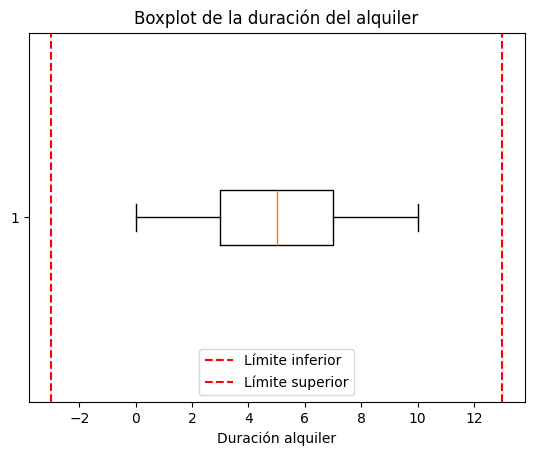

In [209]:
# Boxplot horizontal
plt.boxplot(df_copy['rental_days'], vert=False)

# Líneas de límite inferior y superior
plt.axvline(lower_bound, color='red', linestyle='--', label='Límite inferior')
plt.axvline(upper_bound, color='red', linestyle='--', label='Límite superior')

plt.xlabel("Duración alquiler")
plt.title("Boxplot de la duración del alquiler")
plt.legend()
plt.show()

##### No se encuentra ningún outlier, todo los datos se encuentran en rango, por lo que no existe ningún sesgo en los datos que puedan modificar su interpretación sobre ellos.

## Columna "amount"

In [210]:
# Cálculo de límites
Q1 = df_copy['amount'].quantile(0.25)
Q3 = df_copy['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

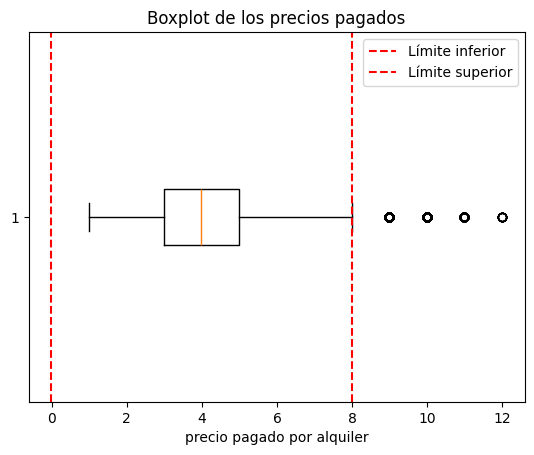

In [211]:
# Boxplot horizontal
plt.boxplot(df_copy['amount'], vert=False)

# Líneas de límite inferior y superior
plt.axvline(lower_bound, color='red', linestyle='--', label='Límite inferior')
plt.axvline(upper_bound, color='red', linestyle='--', label='Límite superior')

plt.xlabel("precio pagado por alquiler")
plt.title("Boxplot de los precios pagados")
plt.legend()
plt.show()

##### Al analizar la columna amount encontramos la presencia de algunos outliers en nuestro dataset. Según los límites definidos:

##### Límite inferior: 0

##### Límite superior: 8

##### La mayoría de los datos se encuentran dentro de este rango, aunque se observa una ligera concentración de valores en el rango 5 a 8, cercano al límite superior. Esto indica que, aunque la mayoría de los alquileres tienen precios moderados, existen pagos relativamente altos que no son frecuentes.

##### Contexto sobre los outliers

##### Es importante tener en cuenta que el valor de amount no refleja únicamente el precio por día de alquiler, sino que también está influenciado por la duración del alquiler. Por lo tanto:

##### Alquilar por más días incrementa el amount total, lo que explica que algunos valores altos puedan considerarse outliers estadísticos pero no necesariamente inusuales desde un punto de vista del negocio.

##### En este sentido, los outliers detectados corresponden principalmente a alquileres de larga duración y representan situaciones plausibles y coherentes con el funcionamiento del sistema de alquileres.

##### Decisión sobre los outliers

##### Dado que los outliers no distorsionan significativamente la distribución general de los pagos y reflejan situaciones reales de negocio, se ha decidido mantenerlos en el análisis. Esto permite:

##### Conservar la integridad de los datos.

##### Reflejar con mayor fidelidad los patrones de gasto de los clientes.

##### Evitar sesgar el análisis eliminando casos que son simplemente menos frecuentes pero válidos.

##### Conclusión

##### Si bien existen valores inusuales en la columna amount, estos no representan errores ni anomalías significativas, sino casos de alquileres más largos. Por lo tanto, la inclusión de estos valores permitirá realizar análisis más completos y representativos del comportamiento real de los clientes.

In [212]:
df_max_amount = df_copy.groupby(['first_name','last_name'])['total_amount_cumsum'].max()


In [213]:
df_max_amount.head()

first_name  last_name
aaron       selby        110.76
adam        gooch        101.78
adrian      clary         71.82
agnes       bishop        98.77
alan        kahn         124.74
Name: total_amount_cumsum, dtype: float64

In [214]:
df_copy.groupby(['first_name', 'last_name']).ngroups


596

# Generación de datos analiticos (media, moda y mediana) y gráficos para cada uno de ellos

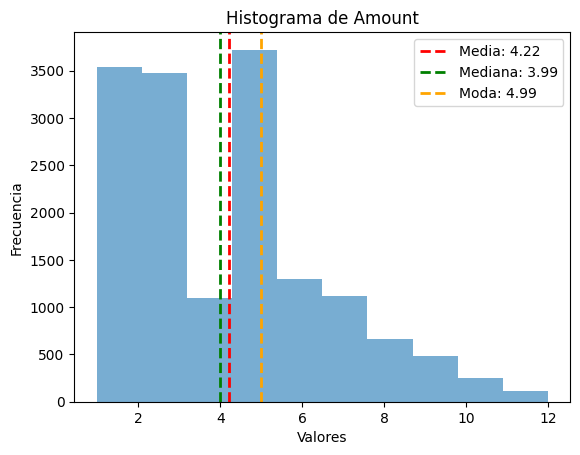

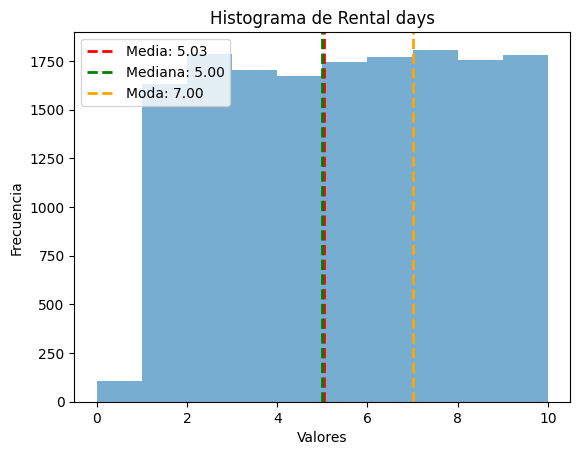

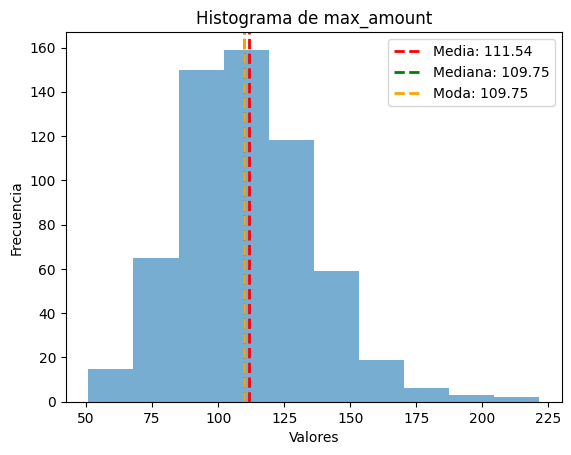

In [215]:
# Lista de columnas del dataframe
datasets = [
    df_copy['amount'], 
    df_copy['rental_days'], 
    pd.Series(df_max_amount.values)   # convertir el array en Serie
]
nombres = ['Amount', 'Rental days', 'max_amount']

for datos, nombre in zip(datasets, nombres):

    datos = datos.dropna()

    media = datos.mean()
    mediana = datos.median()
    moda = datos.mode().iloc[0]

    plt.hist(datos, bins=10, alpha=0.6)

    plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
    plt.axvline(moda, color='orange', linestyle='--', linewidth=2, label=f'Moda: {moda:.2f}')

    plt.title(f"Histograma de {nombre}")
    plt.xlabel("Valores")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()


# Amount

##### La distribución del precio del alquiler presenta un patrón concentrado en el rango bajo, lo que indica que la mayoría de los alquileres tienen un coste reducido.

#### Media ≈ 4,22
##### La media se sitúa cerca del inicio del rango de valores, lo que revela que, en promedio, los precios son relativamente bajos. Además, su cercanía al resto de medidas sugiere que no existen valores extremos que distorsionen demasiado el promedio.

#### Mediana ≈ 3,99
##### La mediana es ligeramente inferior a la media, reflejando que la mitad de los alquileres se encuentran por debajo de ese precio. Esta diferencia pequeña indica una distribución moderadamente sesgada hacia la derecha, es decir, hay algunos valores más altos que empujan la media ligeramente hacia arriba.

#### Moda ≈ 4,99
##### El valor más frecuente es 4,99, que está por encima tanto de la media como de la mediana. Esto sugiere que, aunque la mayoría de precios son bajos, existe un precio estandarizado que se repite con frecuencia —posiblemente asociado a una tarifa habitual o un tipo de película específico.

##### Resumen interpretativo

##### La distribución muestra:

##### Predominio de alquileres de bajo coste.

##### Una ligera asimetría hacia precios más altos.

##### Una tarifa “estándar” (4,99) que aparece como el precio más común.

##### En conjunto, esto apunta a un sistema de precios relativamente uniforme con algunos alquileres más caros que elevan ligeramente la media.

# Rental days

##### La distribución de la duración del alquiler muestra un patrón relativamente uniforme a partir de 1 día, sin grandes concentraciones en valores específicos aparte de la moda. Esto sugiere que los clientes alquilan películas por rangos de tiempo variados, sin una preferencia excesivamente marcada.

#### Media ≈ Mediana
##### El hecho de que ambas medidas sean prácticamente iguales indica que la distribución es simétrica y no está afectada por valores atípicos. No hay una desviación anómala hacia duraciones extremadamente largas o cortas; los datos se comportan de manera estable y equilibrada.

#### Moda = 7 días
##### El valor más frecuente es 7 días, lo que sugiere que existe un patrón común o una tarifa estándar asociada a una semana de alquiler. Esto es coherente con prácticas habituales de alquiler donde una semana suele ser un período estándar para los clientes.

##### Resumen interpretativo

##### La duración del alquiler se reparte de manera bastante homogénea.

##### La similitud entre media y mediana indica ausencia de sesgos y estabilidad en los datos.

##### La moda de 7 días apunta a una práctica común entre los clientes, posiblemente asociada a un tipo de paquete o tarifa semanal.

##### No se detectan valores atípicos importantes, lo que refuerza la fiabilidad de este conjunto de datos para análisis posteriores.

# Max amount

##### Aunque la gráfica representa valores continuos, se observa una concentración clara de los montos máximos acumulados en un intervalo aproximado entre 80 y 130, lo que indica que la mayoría de los clientes alcanzan un nivel de gasto total similar tras acumular varios alquileres.

##### Media ligeramente superior a la mediana y moda
##### Que la media esté un poco por encima del resto de medidas sugiere una ligera asimetría hacia valores más altos. Esto significa que algunos clientes alcanzan un gasto acumulado más elevado que el resto, lo cual empuja la media hacia arriba, pero no lo suficiente como para generar un sesgo fuerte.

##### Mediana y moda muy próximas
##### La cercanía entre estas dos medidas indica que la mayor parte de los clientes tienen un comportamiento de gasto bastante homogéneo. La moda, al representar el valor más repetido, señala el nivel de gasto máximo en el que se sitúa con más frecuencia el cliente promedio.

##### Resumen interpretativo

##### El rango entre 80 y 130 concentra la mayoría de los valores máximos acumulados por cliente.

##### La relación entre media, mediana y moda indica una distribución estable con ligera inclinación hacia montos algo más altos.

##### No se observan valores extremos que distorsionen el conjunto de datos.

##### El comportamiento de gasto de los clientes parece relativamente consistente, mostrando un patrón claro en la acumulación de pagos a lo largo del tiempo.

In [216]:
df_copy.head()

,rental_date,return_date,first_name,last_name,district,postal_code,city,country,amount,rental_days,total_amount_cumsum,long_rental
rental_id,,,,,,,,,,,,
76,2005-05-25,2005-06-03,mary,smith,nagasaki,35200,sasebo,japan,2.99,9,2.99,True
573,2005-05-28,2005-06-03,mary,smith,nagasaki,35200,sasebo,japan,0.99,6,3.98,False
1185,2005-06-15,2005-06-23,mary,smith,nagasaki,35200,sasebo,japan,5.99,8,9.97,True
1422,2005-06-15,2005-06-19,mary,smith,nagasaki,35200,sasebo,japan,0.99,4,10.96,False
1476,2005-06-15,2005-06-25,mary,smith,nagasaki,35200,sasebo,japan,9.99,10,20.95,True


# Generar gráfica para diferenciar las peliculas de duración de alquiler  <6 y >6

<function matplotlib.pyplot.show(close=None, block=None)>

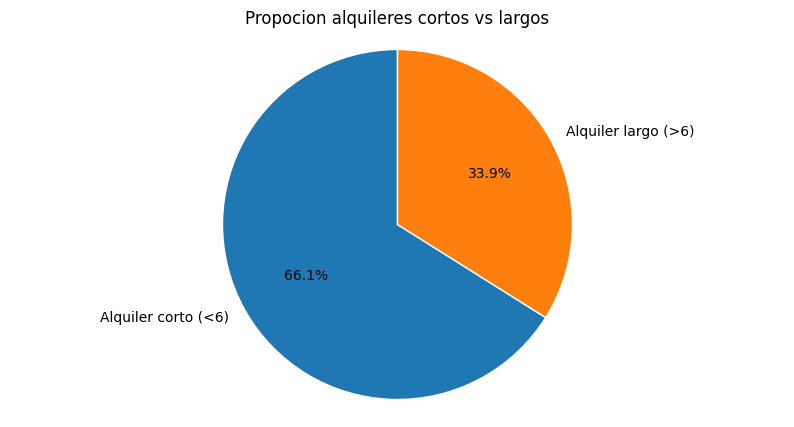

In [217]:
values = df_copy['long_rental'].value_counts()
labels = ['Alquiler corto (<6)', 'Alquiler largo (>6)']

plt.figure(figsize=(10, 5))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title("Propocion alquileres cortos vs largos")
plt.axis('equal')
plt.show

##### Los datos muestran que los alquileres de corta duración representan aproximadamente dos tercios del total, lo cual sugiere que la mayoría de los usuarios buscan un acceso rápido y limitado al contenido.

##### Este comportamiento es coherente con los hábitos habituales de consumo audiovisual: la mayoría de las personas suele necesitar solo unas horas o un par de días para ver una película o disfrutar de un contenido puntual, sin requerir periodos largos.

##### Además, el predominio de alquileres cortos puede reflejar varios patrones interesantes:

##### Optimización del costo: los usuarios tienden a elegir la opción más económica cuando saben que verán el contenido una sola vez o en un periodo breve.

##### Consumo inmediato: las plataformas de streaming y el fácil acceso a contenido generan un comportamiento más impulsivo y orientado al corto plazo.

##### Uso compartido en el hogar: aunque el alquiler lo realice una persona, el contenido puede ser visto por distintos miembros del hogar en días próximos. Esto hace que un alquiler corto siga siendo suficiente sin necesidad de extender el periodo.

##### Menor necesidad de planificación: los periodos largos suelen utilizarse cuando se trata de series extensas o contenido que requiere más tiempo, pero en el caso de películas o material más ligero, el alquiler corto es más práctico.

##### En conjunto, estos factores indican que el patrón predominante de alquileres cortos responde a un consumo rápido, familiar y orientado a minimizar costos, más que a una necesidad de disponibilidad prolongada del contenido.

# Generar datos y gráfico para alquileres en función de su pais (columna country)

# Formato de cantidad

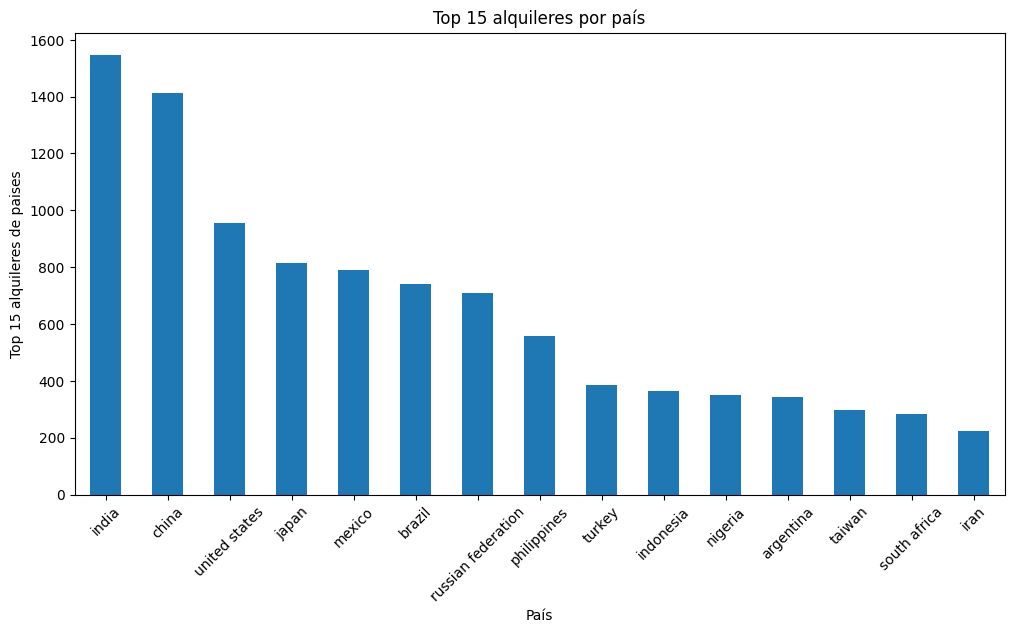

In [219]:
df_copy['country'].value_counts().head(15).plot(kind='bar', figsize=(12,6))

plt.xlabel("País")
plt.ylabel("Top 15 alquileres de paises")
plt.title("Top 15 alquileres por país")
plt.xticks(rotation=45)
plt.show()

# Formato de porcentajes

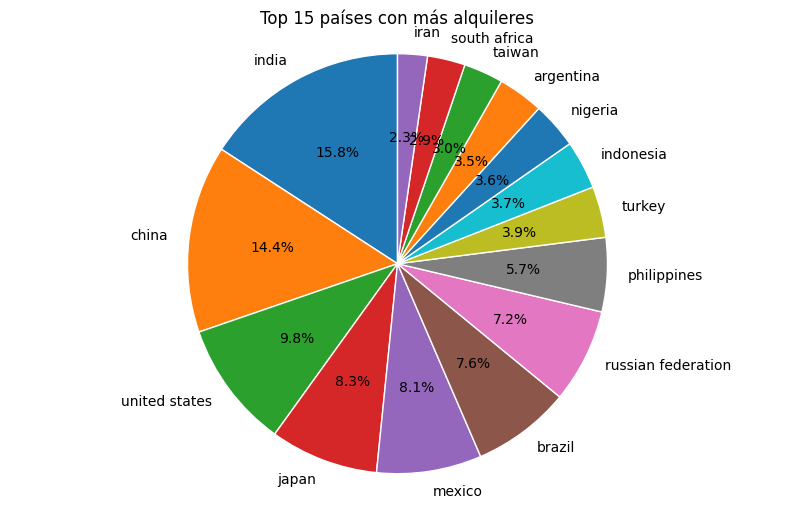

In [218]:
# Contar cuántas películas hay por género
country_counts = df_copy['country'].value_counts().head(15)

# Crear el gráfico circular
plt.figure(figsize=(10,6))
plt.pie(
    country_counts.values,
    labels=country_counts.index,
    autopct='%1.1f%%',   # Muestra el porcentaje
    startangle=90,       
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Top 15 países con más alquileres")
plt.axis('equal') 
plt.show()

##### El gráfico muestra cómo se distribuyen los alquileres entre los 15 países con mayor actividad. Se observan varias tendencias importantes:

### India y China dominan el volumen de alquileres

##### India (~15.8%) es el país con mayor participación, seguido por China (~14.4%).

##### Juntos representan más del 30% del total.

##### Esto puede deberse a:

##### Poblaciones muy grandes.

##### Alto nivel de consumo de contenido audiovisual.

##### Amplia adopción de servicios digitales.

### Grupo de países con participación media

##### United States (~9.8%)

##### Japan (~8.3%)

##### Mexico (~8.1%)

##### Brazil (~7.6%)

##### Russian Federation (~7.2%)

##### Philippines (~5.7%)

##### Aportan una parte relevante del total, aunque lejos del liderazgo asiático. Esto sugiere mercados sólidos, con usuarios activos pero no tan masivos como India o China.

### Países con participación menor pero significativa

##### Turkey

##### Indonesia

##### Nigeria

##### Argentina

##### South Africa

##### Taiwan

##### Iran

##### Cada uno aporta entre 2% y 4%, mostrando que existe una base de usuarios distribuida globalmente, aunque con menor volumen.

### Tendencia general: mercado diversificado, pero concentrado

##### El gráfico refleja una combinación interesante:

##### Alta concentración en pocos países (los primeros 5 representan más del 50%).

##### Diversificación global, con presencia en múltiples regiones — Asia, América, Europa, África.

### Conclusiones clave

##### Asia es la región dominante, especialmente con India, China y en menor medida Filipinas, Japón e Indonesia.

##### Estados Unidos y Latinoamérica (México, Brasil, Argentina) también muestran una participación relevante.

##### La distribución indica que el servicio de alquiler tiene alcance global, pero su mayor demanda proviene de países densamente poblados y digitalmente activos.

##### Entender estos patrones es útil para tomar decisiones como:

##### Dónde invertir en marketing.

##### Qué contenido optimizar para ciertos mercados.

##### Qué regiones podrían tener potencial de crecimiento.